# Se trabaja con un archivo de notas de asignaturas de una carrera de Ingeniería. La escala de notas es del 1 al 7.

In [3]:
import pandas as pd
import numpy as np

In [2]:
#header=1 permite que tome el encabezado de cada columna desde la fila 1 del archivo
#index col = 0, define los indices de cada una de las filas, los cuales seran los que esten en la columna 0 del archivo

df = pd.read_csv('DATAS/Calificaciones/Notas1_Ajustadas.csv', index_col = 0)

print(df)
print(df.dtypes)

           Sexo  NotaProm  NotaFin     Asig   Año Semestre       Turno  \
Estudiante                                                               
1             M       5.0      4.7  DPA7101  2021        1  Vespertino   
2             M       5.8      5.8  DPA7101  2021        1  Vespertino   
3             M       3.6      2.6  DPA7101  2021        1  Vespertino   
4             M       3.8      4.0  DPA7101  2021        1  Vespertino   
5             M       4.3      4.7  DPA7101  2021        1  Vespertino   
...         ...       ...      ...      ...   ...      ...         ...   
452           M       6.1      5.3  PCI1101  2019        1      Diurno   
453           M       6.1      4.9  PCI1101  2019        1      Diurno   
454           M       4.2      4.0  PCI1101  2019        1      Diurno   
455           M       4.0      4.0  PCI1101  2019        1      Diurno   
456           M       5.3      3.6  PCI1101  2019        1      Diurno   

           AprobAsig  NotaET AprobET 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

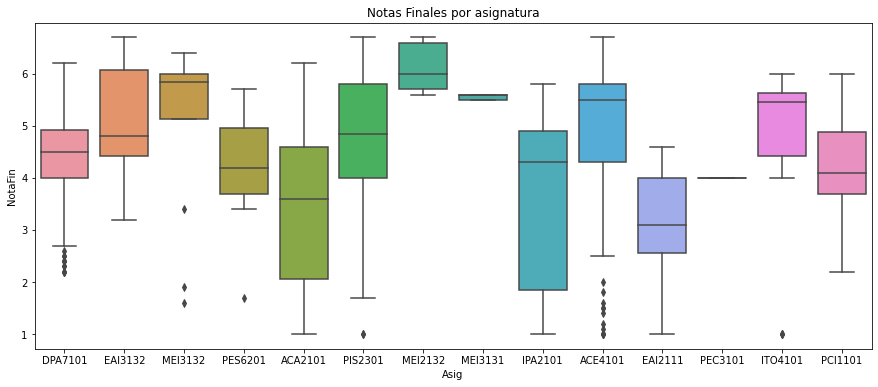

In [5]:
#Se define el tamaño del gráfico
plt.figure(figsize = (15, 6))

#Se crea el boxplot de las notas finales para cada una de las asignaturas 
sns.boxplot(x = 'Asig', y = 'NotaFin', data = df) 

#Se coloca el título a la gráfica
plt.title("Notas Finales por asignatura");

# Se extrae la asignatura con más datos atípicos ACE4101

In [6]:
print(df.loc[ df["Asig"] == 'ACE4101'])

           Sexo  NotaProm  NotaFin     Asig   Año Semestre       Turno  \
Estudiante                                                               
207           M       5.1      4.4  ACE4101  2019        2  Vespertino   
208           M       6.0      6.0  ACE4101  2019        2  Vespertino   
209           M       5.9      5.9  ACE4101  2019        2  Vespertino   
210           M       5.0      4.2  ACE4101  2019        2  Vespertino   
211           M       5.5      5.5  ACE4101  2019        2  Vespertino   
...         ...       ...      ...      ...   ...      ...         ...   
285           M       5.6      5.6  ACE4101  2019        2  Vespertino   
286           M       6.0      6.0  ACE4101  2019        2  Vespertino   
287           M       5.6      5.6  ACE4101  2019        2  Vespertino   
288           M       1.8      1.5  ACE4101  2019        2  Vespertino   
289           M       6.5      6.5  ACE4101  2019        2  Vespertino   

           AprobAsig  NotaET AprobET 

In [7]:
dfACE4101 = df.loc[ df["Asig"] == 'ACE4101']
print(dfACE4101)

           Sexo  NotaProm  NotaFin     Asig   Año Semestre       Turno  \
Estudiante                                                               
207           M       5.1      4.4  ACE4101  2019        2  Vespertino   
208           M       6.0      6.0  ACE4101  2019        2  Vespertino   
209           M       5.9      5.9  ACE4101  2019        2  Vespertino   
210           M       5.0      4.2  ACE4101  2019        2  Vespertino   
211           M       5.5      5.5  ACE4101  2019        2  Vespertino   
...         ...       ...      ...      ...   ...      ...         ...   
285           M       5.6      5.6  ACE4101  2019        2  Vespertino   
286           M       6.0      6.0  ACE4101  2019        2  Vespertino   
287           M       5.6      5.6  ACE4101  2019        2  Vespertino   
288           M       1.8      1.5  ACE4101  2019        2  Vespertino   
289           M       6.5      6.5  ACE4101  2019        2  Vespertino   

           AprobAsig  NotaET AprobET 

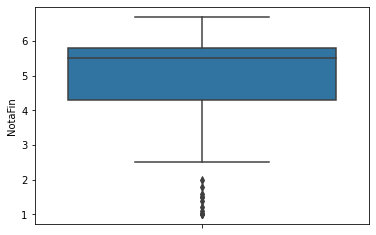

In [8]:
sns.boxplot(y = 'NotaFin', data = dfACE4101)
plt.show()

# Se obtiene la estadistica descriptiva de las notas finales

In [11]:
a = dfACE4101['NotaFin'].describe()
a

count    83.000000
mean      4.772289
std       1.610356
min       1.000000
25%       4.300000
50%       5.500000
75%       5.800000
max       6.700000
Name: NotaFin, dtype: float64

# Se calcula el rango intercuartil

In [12]:
iqr = a[6]-a[4]
iqr

1.4999999999999991

# Se obtienen los limites del Boxplot

In [14]:
limitmin = a[4]-1.5*iqr
limitmax = a[6]+1.5*iqr
print(limitmin, limitmax)

2.050000000000002 8.049999999999999


# Se determinan los datos atípicos

In [17]:
Atipicos = []
c = dfACE4101['NotaFin']
    
for Nota in c:
    if Nota > limitmax:
        Atipicos.append(Nota)
    elif Nota < limitmin:
        Atipicos.append(Nota)
    
print(Atipicos)

[2.0, 1.4, 1.0, 1.0, 1.6, 1.0, 1.8, 1.2, 1.0, 1.1, 1.5, 1.5]
